## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [25]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


3
<class 'pandas.core.series.Series'> count      1499.000000
mean      26081.291528
std       13286.791131
min        2929.500000
25%       16281.000000
50%       24156.000000
75%       33025.500000
max      103378.500000
Name: AMT_ANNUITY, dtype: float64
2
<class 'pandas.core.series.Series'> count      1212.000000
mean      27607.693069
std       14451.724035
min        3640.500000
25%       16849.125000
50%       25472.250000
75%       35412.750000
max      104094.000000
Name: AMT_ANNUITY, dtype: float64
1
<class 'pandas.core.series.Series'> count    154291.000000
mean      26150.155207
std       13672.080716
min        1615.500000
25%       16155.000000
50%       24232.500000
75%       33025.500000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64
0
<class 'pandas.core.series.Series'> count    150497.000000
mean      28097.366668
std       15238.445802
min        1993.500000
25%       16875.000000
50%       25627.500000
75%       35995.500000
max      258025.500000
Name: AMT_

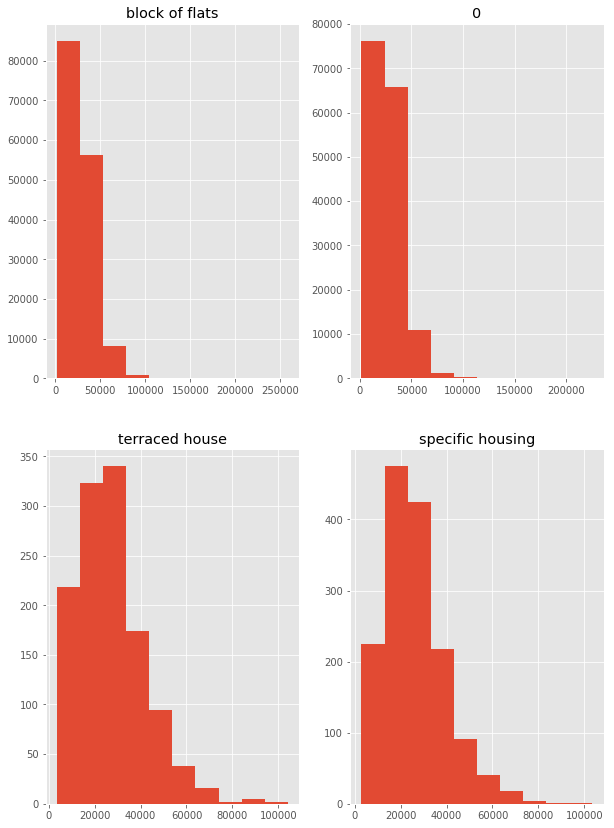

In [26]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
app_train["HOUSETYPE_MODE"] = app_train["HOUSETYPE_MODE"].fillna(0)
app_train["HOUSETYPE_MODE"] = le.fit_transform(np.stack(app_train["HOUSETYPE_MODE"]))
# print(app_train["HOUSETYPE_MODE"].unique())
unique_house_type = app_train["HOUSETYPE_MODE"].unique()
keys = le.inverse_transform(unique_house_type)
dic = {}
for key, value in zip(unique_house_type, keys):
    dic[key] = value
nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)-1,-1,-1):
    plt.subplot(nrows, ncols, i+1)
    data = app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[i]]["AMT_ANNUITY"]
    data.hist()
    plt.title(dic[unique_house_type[i]])
plt.show()    